

## <font color='green'>        Análise de Dados de RH (Recursos Humanos)</font>


#### Problema de negócio: O RH possui informações geradas em seu banco de dados de candidatos e quer filtrar entre o nível de escolaridade, área cursada na graduação e anos de experiência para que assim possa selecionar perfis para atuarem em vagas de tecnologia da empresa. O objetivo é  contratar  os  profissionais  com  perfil  adequado, a  fim  de reduzir  o  custo  e  o  tempo de contratação pela área.

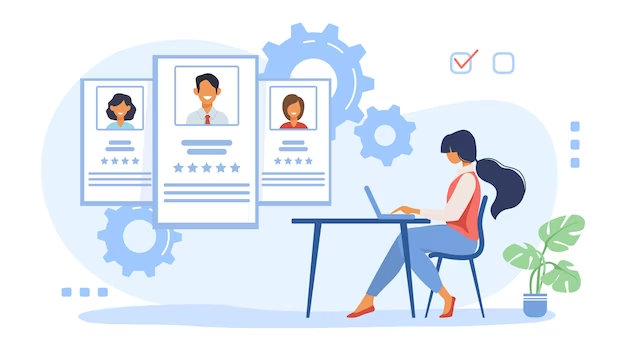

In [1]:
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Esse pacote para criar mapa de valores ausentes
!pip install -q missingno

In [3]:
# Pacote que permite aplicar categorização nas variáveis 
!pip install -q category_encoders

In [4]:
# Pacote para criação de gráficos
!pip install -q plotly

In [5]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning = avisos de desenvolvedores
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Carregando os dados

In [6]:
df = pd.read_csv("dataset/aug_train.csv")

In [7]:
df.shape

(19158, 14)

In [8]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [9]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Análise Exploratória de Dados

In [11]:
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [12]:
# Drop vai remover as duas colunas pois elas não interessam nesse contexto, pois uma é o ID e outra é categórica
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


#### Visualizando as Variáveis Categóricas 

In [13]:
# Irá trazer os valores das colunas 3 até 12 em forma de lista
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

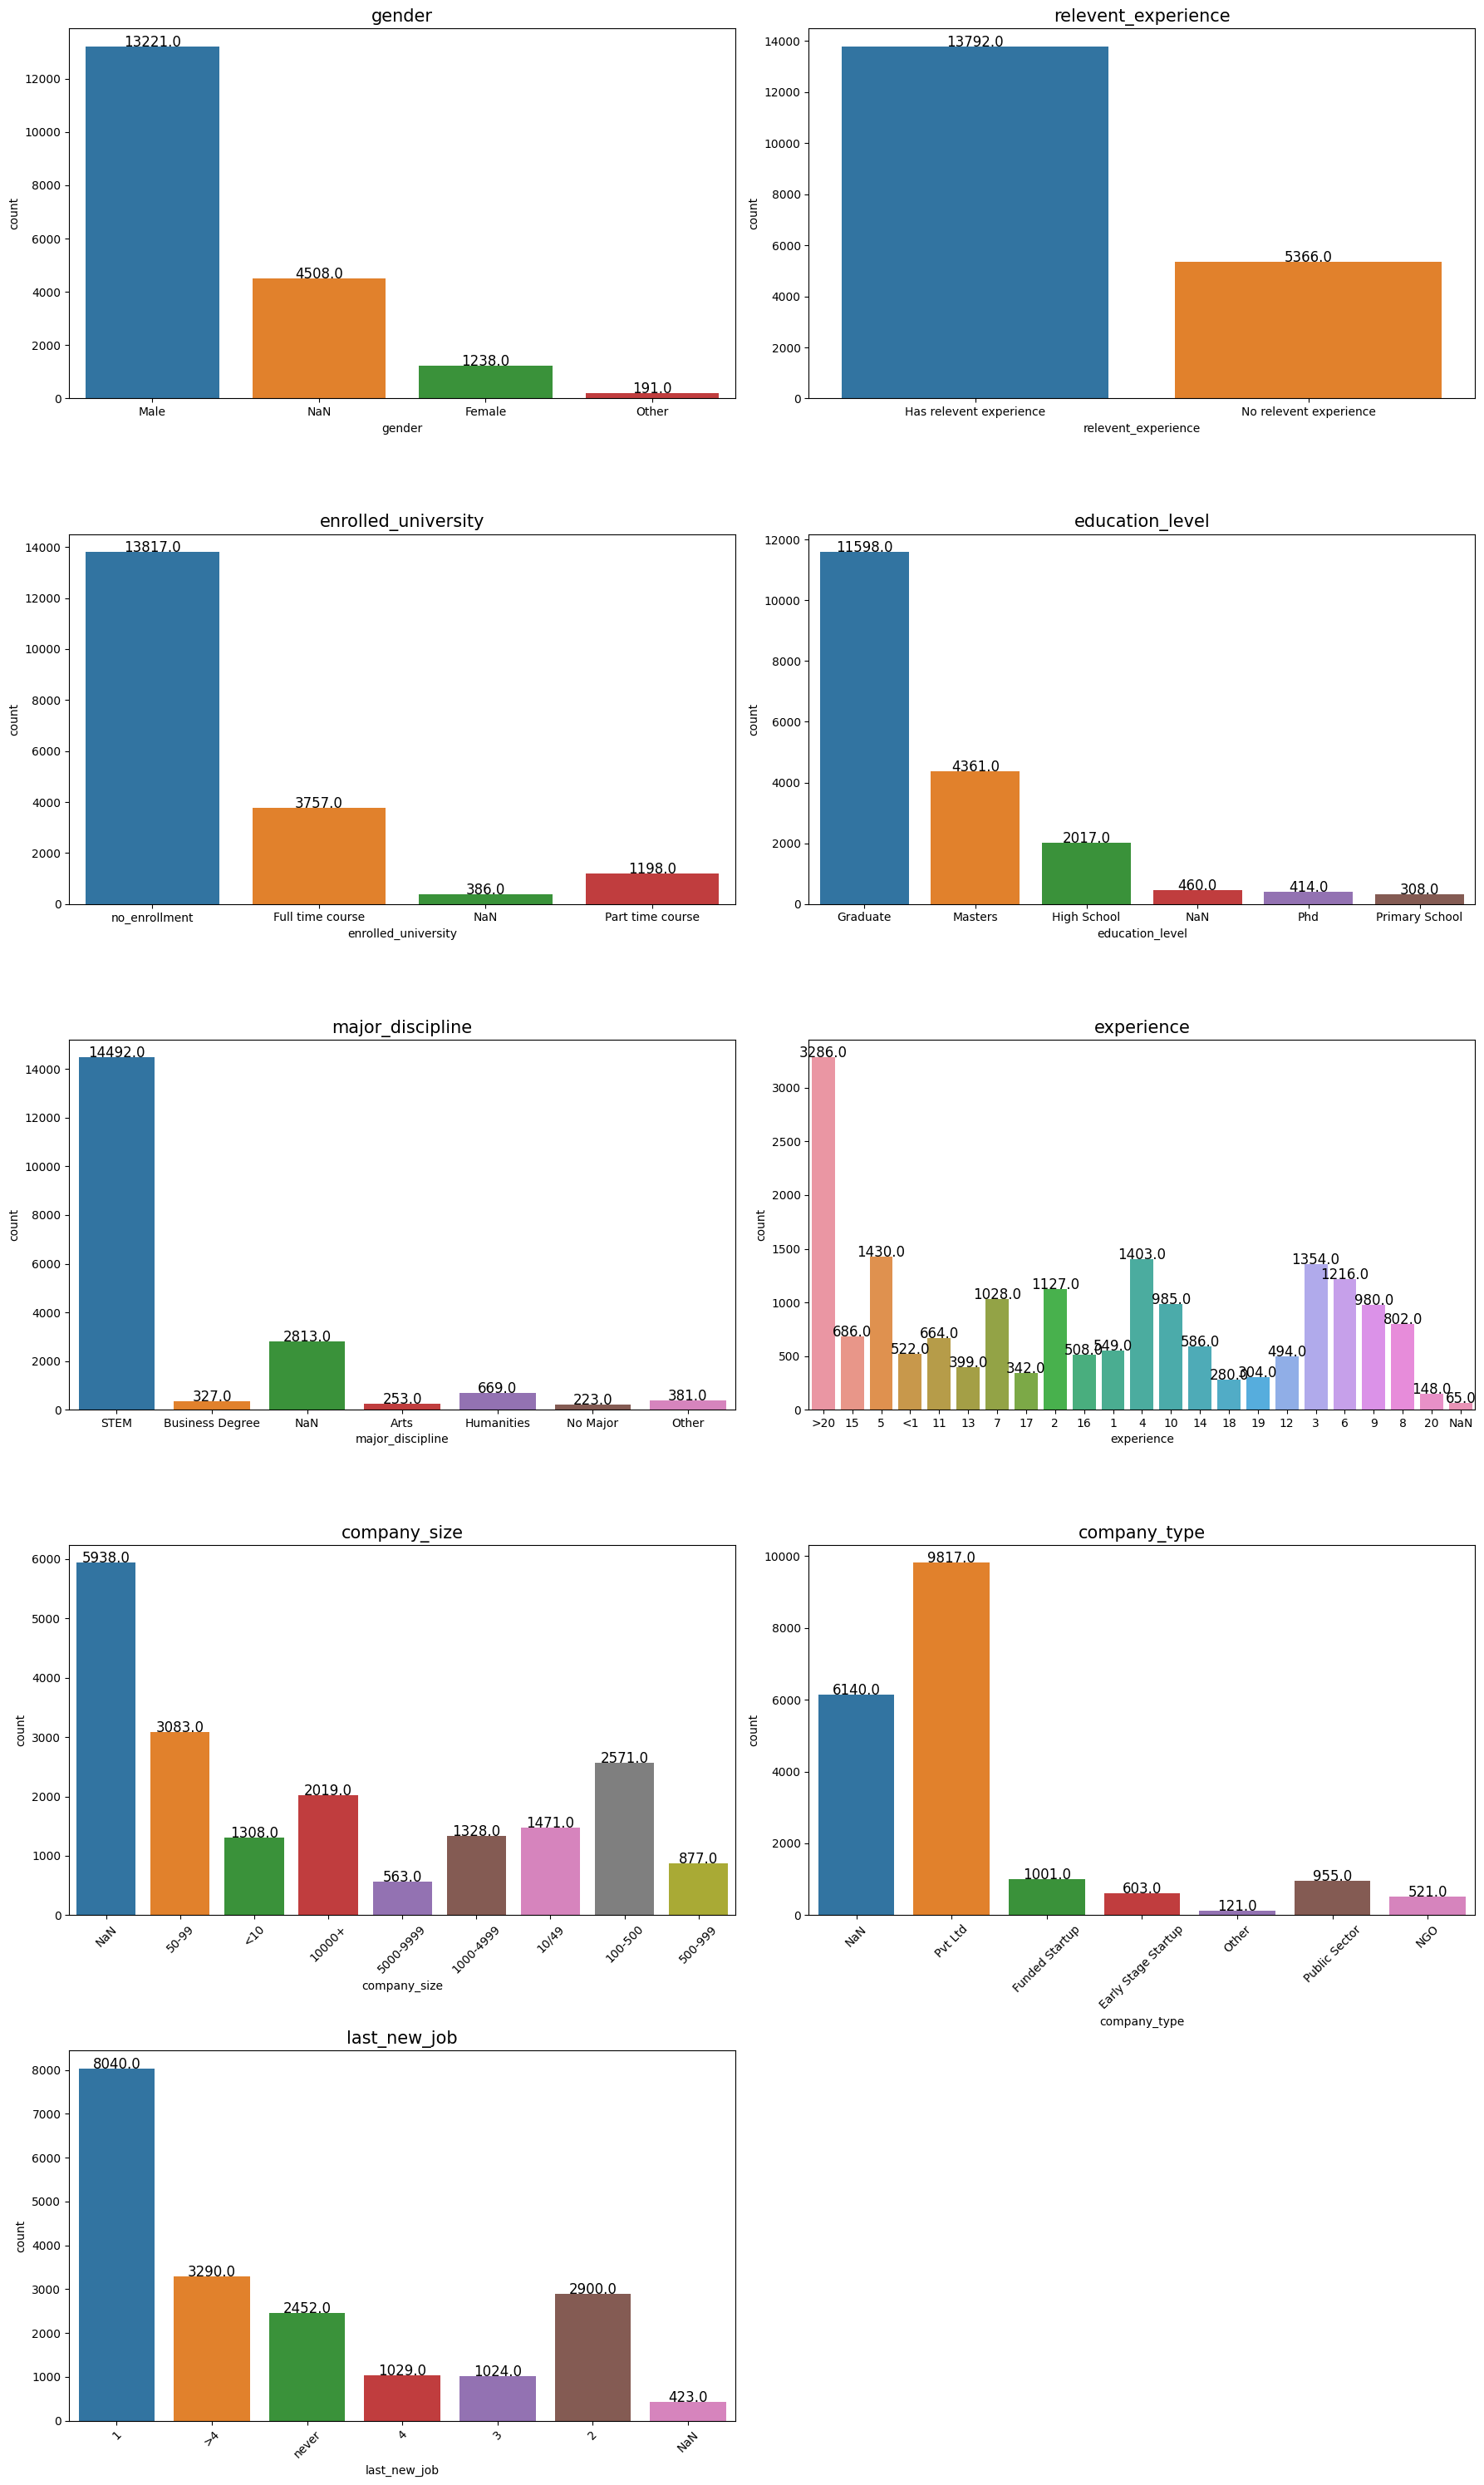

In [14]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

### Verificando a Distribuição das Variáveis Numéricas

In [15]:
# Criação de uma cópia do dataframe original
df_numerical = df.copy()

In [16]:
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [17]:
# Conversão da variável experience para numérica; transformar em float para ser plotada no boxplot
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [18]:
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [19]:
df_numerical.describe().drop(columns = ['enrollee_id', 'target', 'city_development_index'])

,experience,training_hours
count,19093.000000,19158.000000
mean,10.127481,65.366896
std,6.738127,60.058462
min,1.000000,1.000000
25%,4.000000,23.000000
50%,9.000000,47.000000
75%,16.000000,88.000000
max,21.000000,336.000000


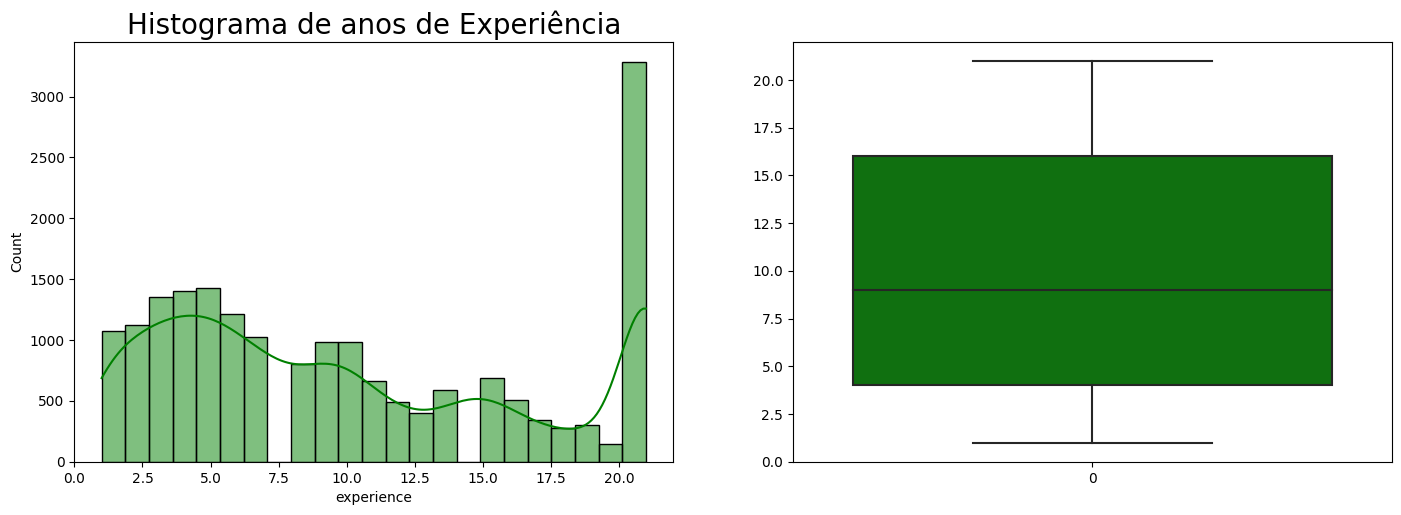

In [20]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df_numerical['experience'], kde = True, color = "green")
plt.title('Histograma de anos de Experiência', fontsize = 20)


# Subplots com boxplots
plt.subplot(222)
sns.boxplot(df_numerical['experience'], color = "green")


plt.show()

#### Teste de Normalidade da Distribuição 
Analisando os gráficos vimos que as variáveis não seguem uma distribuição normal. Para validar essa informação, será aplicada um teste de normalidade da distribuição (valor-p na função normaltest). Importante para determinar se deve usar teste paramêtricos ou não paramêtricos ao decorrer da análise. 

In [21]:
#Lista com as variáveis numéricas
numerical_feature = ['experience']

#Loop
for i in numerical_feature:
    #Calcula a normalidade - pacote do scipy
    stats, pval = normaltest(df[i])
    
    #checar valor-p 
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

experience : Distribuição Não Normal


### Correlação entre Variáveis Numéricas
Analise da correlação dos dados (Spearman) entre as variáveis numéricas.

In [22]:
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,training_hours,target
city_development_index,1.000000,0.300997,0.007491,-0.279165
experience,0.300997,1.000000,0.003569,-0.183721
training_hours,0.007491,0.003569,1.000000,-0.014126
target,-0.279165,-0.183721,-0.014126,1.000000


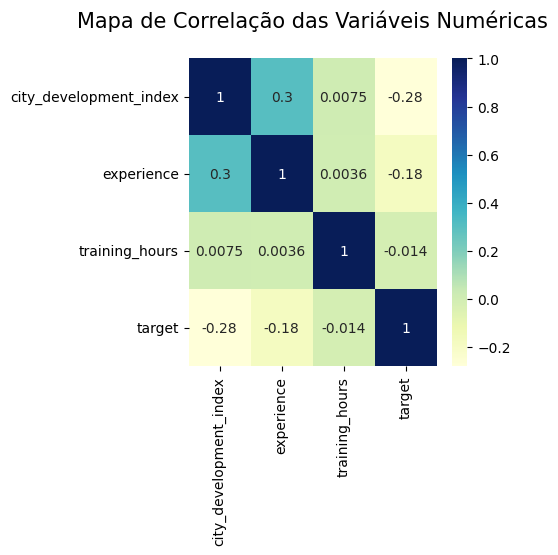

In [23]:
# Heatmap
plt.figure(figsize = (4,4))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Pela correlação de spearman, city_development_index e experience têm correlação moderada positiva (0,3), enquanto outros têm correlação fraca. 

### Relação entre Variáveis Categóricas
Método de coeficiente de contigência de Pearson

In [24]:
from scipy.stats import chi2_contingency

In [25]:
dados = pd.crosstab(df['education_level'], df['relevent_experience'])

# Executar o teste Qui-quadrado e obter os resultados
chi2, p_value, dof, expected = chi2_contingency(dados)

# Calcular o coeficiente de contingência de Pearson
pearson_coef = np.sqrt(chi2 / (dados.sum().sum() * (min(dados.shape)-1)))

print("Coeficiente de contingência de Pearson:", pearson_coef)

Coeficiente de contingência de Pearson: 0.31753213771320105


Resultado do coeficente nos mostra que as variáveis possuem uma relação positiva, porém muito baixa entre elas. 

### Identificando Valores Duplicados 

In [26]:
df['enrollee_id'].duplicated().sum()

0

### Identificando Dados Desbalanceados

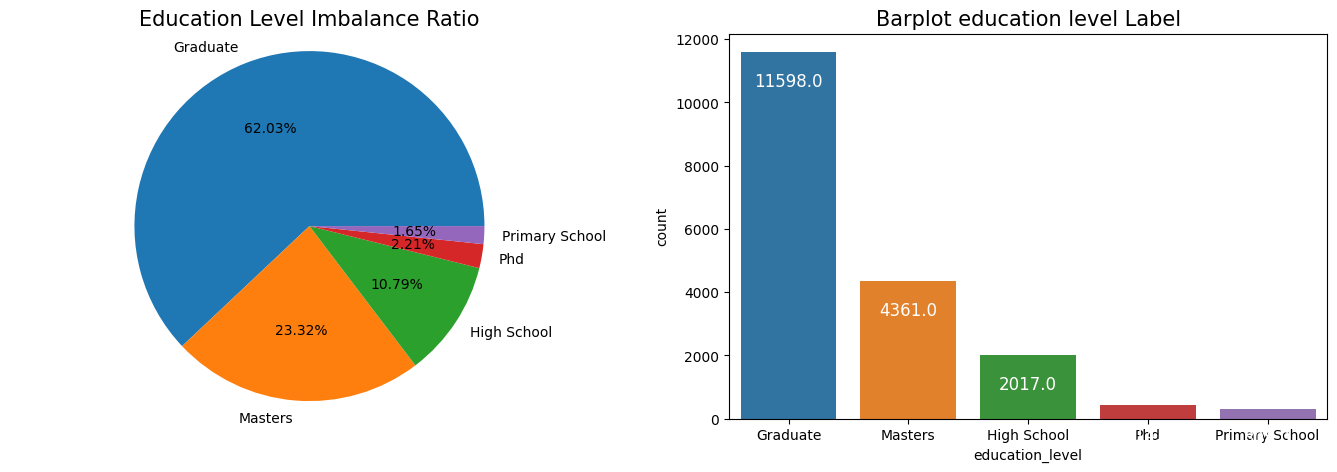

In [27]:
# Figura
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['education_level'].value_counts() / len(df) * 100, 2),
        labels = list(df['education_level'].value_counts().index),
        autopct = "%.2f%%")

plt.axis("equal")
plt.title("Education Level Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'education_level')
plt.title("Barplot education level Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

Para verificação foi usada a variável categórica "experience", onde foi visto que os dados estão balanceados de acordo com o dataset apresentado. Faz total sentido um maior número de graduados principalmente quando comparamos com os candidatos que continuam, atualmente, matriculados.

## Limpeza e Processamento dos Dados

#### Identificando e Tratando os Valores Ausentes

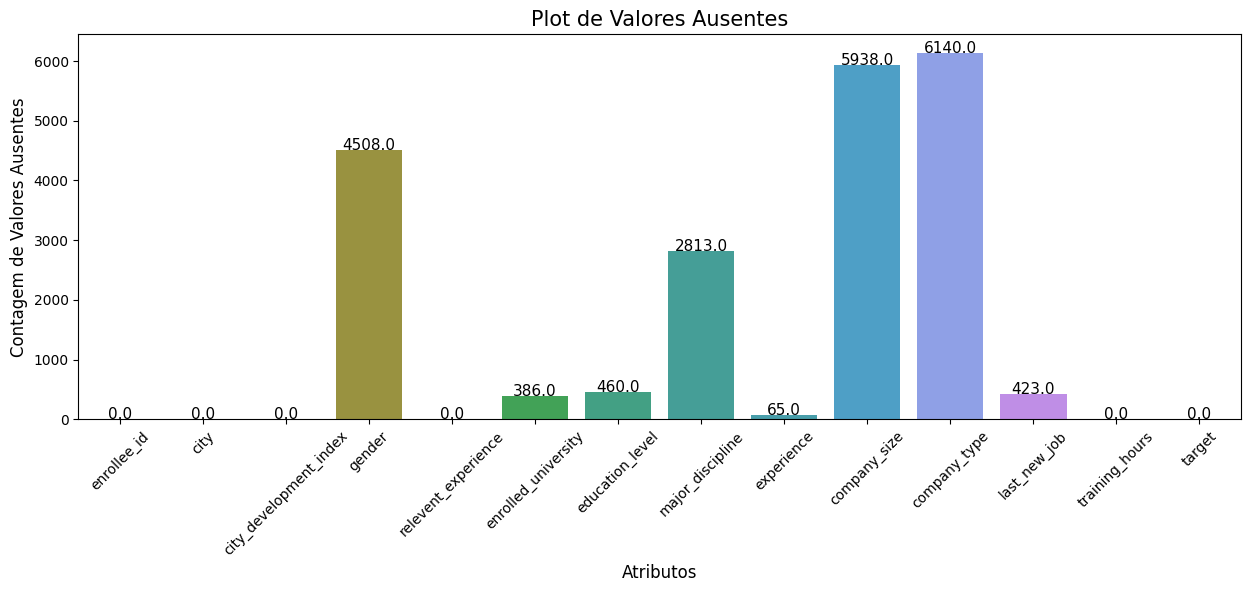

In [28]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(x='index', y=0, data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

In [29]:
colunas_trat = ['education_level',
                'major_discipline',
                'experience']

In [30]:
new_df = df[colunas_trat]

In [31]:
new_df.head()

,education_level,major_discipline,experience
0,Graduate,STEM,>20
1,Graduate,STEM,15
2,Graduate,STEM,5
3,Graduate,Business Degree,<1
4,Masters,STEM,>20


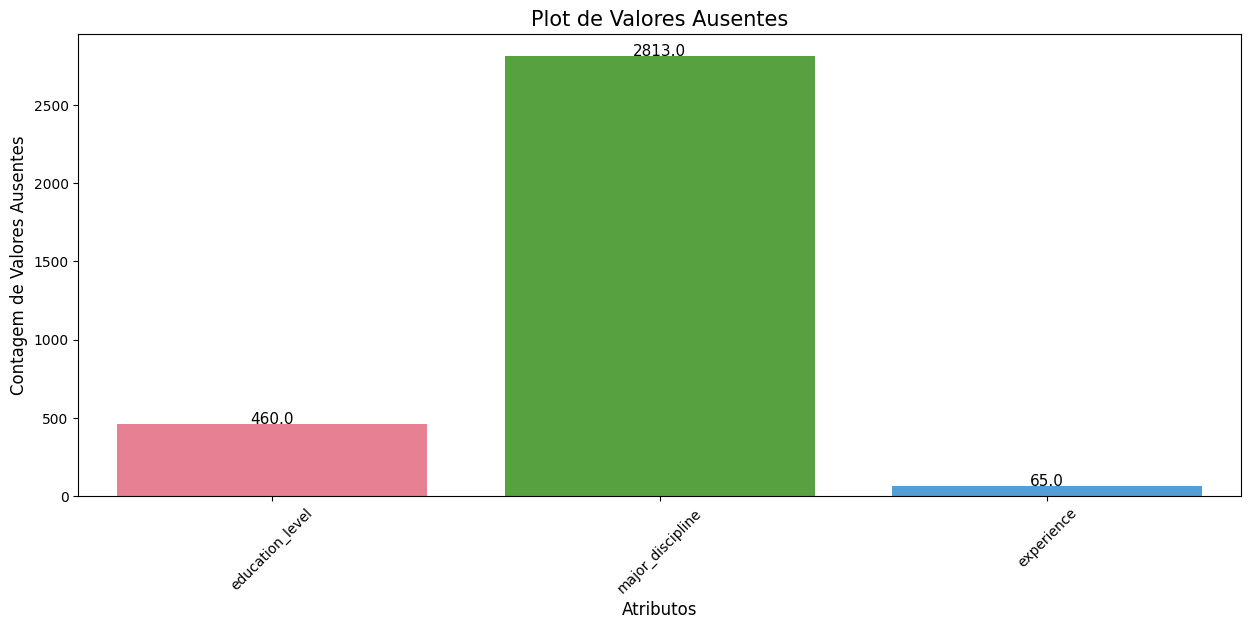

In [32]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x='index', y=0, data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

 Tratamento da variável major_discipline

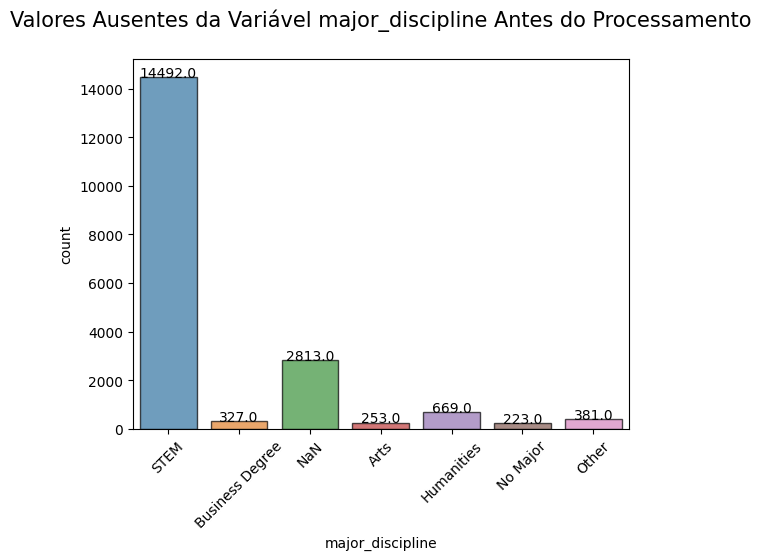

In [33]:
sns.countplot(data= new_df.fillna('NaN'), x= 'major_discipline', alpha = 0.7, edgecolor= 'black')
plt.xticks(rotation = 45)
bound= ax.get_xbound()
ax= plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize = 15)
plt.show()

In [34]:
print('Proporção de Valores Ausentes na Variável education_level: ')
new_df['education_level'].value_counts()

Proporção de Valores Ausentes na Variável education_level: 


Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [35]:
print(new_df['education_level'].isna().sum())

460


Relação entre major_discipline x education_level:  
 Para tratar os dados ausentes da variável major_discipline, foi levado em consideração que o número das categorias 'High School' e 'Primary School' da variável education_level, pois são os casos que não possuem ensino superior. Dessa forma foi criada a regra abaixo para substituir os valores da variável. 

In [36]:
# Índice criado
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index

In [37]:
len(nan_index)

2785

In [38]:
# Substituição dos valores ausentes
new_df['major_discipline'][nan_index] = 'Non Degree'

In [39]:
new_df['major_discipline'].isnull().sum()

28

In [40]:
# Para os 28 valores ausentes após a substituição serão aplicados como 'Other'
new_df[new_df['major_discipline'].isna()] = 'Other'

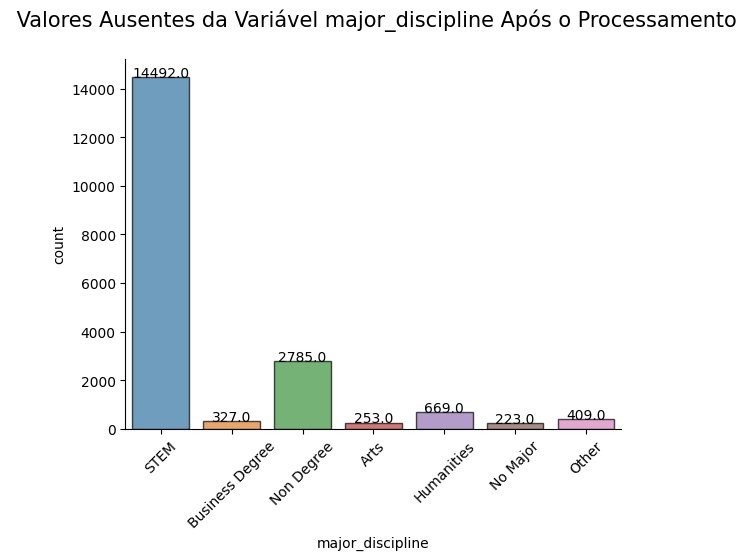

In [41]:
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

Tratamento da variável education_level

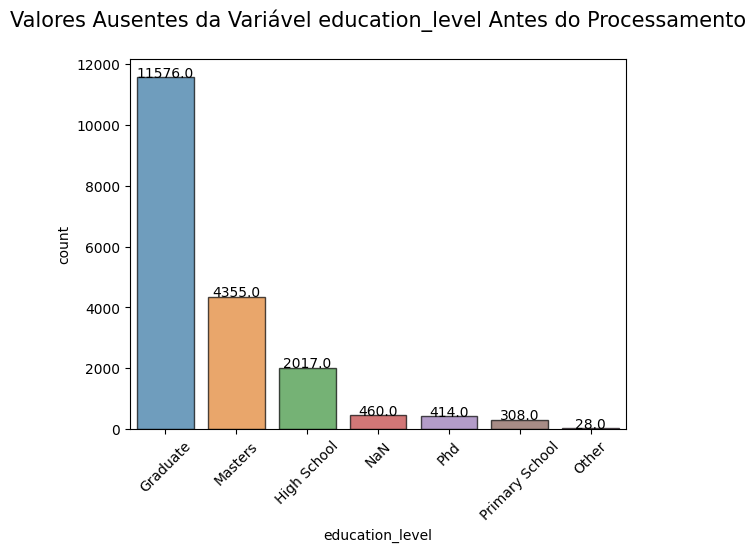

In [42]:
sns.countplot(data= new_df.fillna('NaN'), x= 'education_level', alpha = 0.7, edgecolor= 'black')
plt.xticks(rotation = 45)
bound= ax.get_xbound()
ax= plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

In [43]:
# Criação do index e substituição dos valores ausentes por 'Other'
nan_index = new_df[(new_df['education_level'].isna())].index

In [44]:
new_df['education_level'][nan_index] = 'Other'

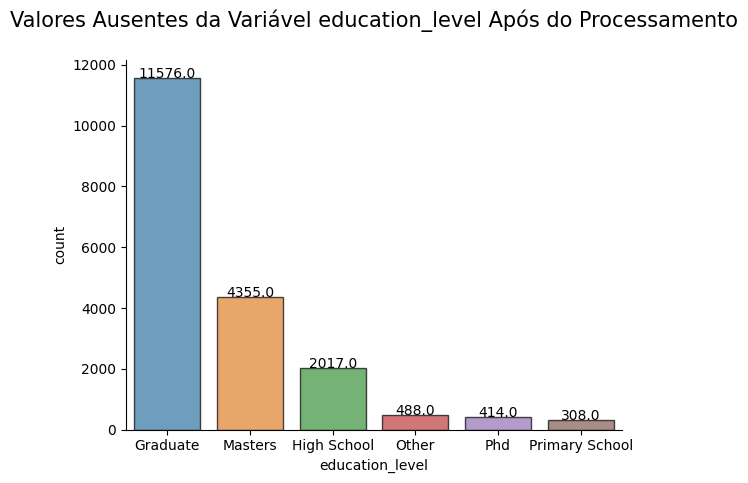

In [45]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n", fontsize = 15)
plt.show()

Tratamento da variável experience

In [46]:
percent = new_df.isnull().sum() / len(new_df) *100
percent

education_level     0.000000
major_discipline    0.000000
experience          0.328844
dtype: float64

In [47]:
new_df['experience'].isnull().sum()

63

Como essa é a última categoria analisada no new_df, foi aplicado o dropna para substituição de valores ausentes. Nesse caso foi visto que os valores ausentes eram muito inferiores comparados com o valor total do dataset e foi resolvido simplesmente excluir sem geração de impacto na análise.

In [48]:
new_df = new_df.dropna()

In [49]:
percent = new_df.isnull().sum() / len(new_df) * 100
percent

education_level     0.0
major_discipline    0.0
experience          0.0
dtype: float64

## Relatório Final

 Com base nos dados analisados, foi visto uma grande tendência de candidatos que possuem experiências relevantes anteriores (grande parte com mais de 20 anos de experiência), com graduação na área de STEM (ciência, tecnologia, estatística e matemática), o que já seria um indicativo pela grande procura da área tecnológica e o RH pode obter maior facilidade em encontrar candidatos para preencher vagas desse segmento.
 
 Caso o RH esteja há procura de estagiários/trainee, os dados mostraram que aproximadamente 26% dos candidatos estão atualmente matriculados em cursos. 
 
 No caso, seria relevante para uma análise mais precisa, o RH incluir no questionamento a área desejada de atuação (para que o analista não se baseie somente na área de graduação do candidato) e o quanto tempo falta para o candidato concluir o curso (nos casos para estágio).

As variáveis consideradas importantes para análise desse projeto:
•	 Nível de escolaridade
•	 Área cursada na graduação
•	 Anos de experiência do candidato
•	 Se possui experiência anterior 
	
As variáveis não relevantes para esse caso de análise foram:
•	 ID do candidato
•	 Código da cidade
•	 O gênero
•	 Última vez que o candidato esteve empregado
•	 Tamanho da empresa onde trabalhou
•	 Total de horas de treinamento	
•	 Se deseja mudar de trabalho atualmente 
•	 Índice de desenvolvimento da cidade


Fonte de dados: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists